In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import cross_val_score,train_test_split
#数据集路径
data_path = 'sonar.all-data'
#读入数据集
df= pd.read_table(data_path,sep = ',+',header=None, engine='python')
#打印数据集标签统计数据
#数据第一列为数据的标签
print("lable")
print(df[60].value_counts())

#y为标签列
y = df[60]
#print(y)
#X为去掉标签列的数据
X = df.drop([60], axis=1)
#print(X)
print("X.shape", X.shape)
print("y.shape", y.shape)

#利用train_test_split方法，将X,y随机划分为训练集（train_data），训练集标签（train_labels），
#测试集（test_data），试集标签（test_labels），按训练集：测试集=1:9的概率划分
train_features,test_features, train_labels,test_labels= train_test_split(X, y, test_size=0.1, random_state=42)

print('train_features', train_features.shape)
print('train_labels', train_labels.shape)
print('test_features', test_features.shape)
print('test_labels', test_labels.shape)

lable
M    111
R     97
Name: 60, dtype: int64
X.shape (208, 60)
y.shape (208,)
train_features (187, 60)
train_labels (187,)
test_features (21, 60)
test_labels (21,)


In [2]:
train_labels2 = []
for i in train_labels:
    if(i == 'R'):
        train_labels2.append(0)
    else:
        train_labels2.append(1)
train_labels2 = np.array(train_labels2)
print(train_labels2)


test_labels2 = []
for i in test_labels:
    if(i == 'R'):
        test_labels2.append(0)
    else:
        test_labels2.append(1)
test_labels2 = np.array(test_labels2)
print(test_labels2)

[1 1 1 0 0 0 0 1 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 0 0 0 1 0 0 0 0 1 1
 0 1 0 1 1 1 1 1 0 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 1 0 0 1 0
 1 0 0 1 1 0 0 1 1 0 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 0 1 0 0 1 0 1 0
 1 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 0 0 1 0 0 1 1 0 0 0 0 1 1 0 0 1 1 1
 1 0 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 0 1 1 0 1 0 1 0 0
 1 1]
[1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1]


In [3]:
# 导入包
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from vecstack import stacking
from sklearn.model_selection import GridSearchCV,ParameterGrid
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics
import warnings

plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False
warnings.filterwarnings('ignore')


In [4]:
#获取准确率最高的rel_knn_algorithm、rel_weight和rel_nearest_neighbor
from sklearn import neighbors,decomposition
rel_nearest_neighbor = 0
rel_knn_algorithm = ''
rel_weight = ''
knn_algorithms = ['ball_tree', 'kd_tree', 'brute']
weights = ['uniform', 'distance']
rel_pre = -1

for knn_algorithm in knn_algorithms:
    #nearest_neighbor参数范围为1-20
    for nearest_neighbor in range(1,int(208 * 0.1)):
        for weight in weights:
            clf = neighbors.KNeighborsClassifier(n_neighbors = nearest_neighbor, weights=weight, algorithm=knn_algorithm)
            clf = clf.fit(train_features, train_labels)

            pre = clf.predict(test_features)
            accuracy = np.sum(pre == test_labels) / pre.shape[0]
            #print('knn_algorithm =',knn_algorithm,',nearest_neighbors =', nearest_neighbor,',weight =',weight,  ',accuracy=', accuracy)
            if accuracy >= rel_pre:
                rel_pre = accuracy
                rel_knn_algorithm =knn_algorithm
                rel_weight = weight
                rel_nearest_neighbor = nearest_neighbor

print('rel_knn_algorithm：',rel_knn_algorithm)
print('rel_weight：',rel_weight)
print('rel_nearest_neighbor：',rel_nearest_neighbor)
from sklearn import neighbors,decomposition
knn_cv = neighbors.KNeighborsClassifier(n_neighbors = rel_nearest_neighbor, weights=rel_weight,
                                     algorithm=rel_knn_algorithm)

rel_knn_algorithm： brute
rel_weight： distance
rel_nearest_neighbor： 2


In [5]:
from sklearn import tree
rel_max_depth = 0
rel_min_samples_leaf = 0
rel_pre = -1

for max_depth in range(train_features.shape[1],2, -1):
    for min_samples_leaf in range(1,int(208 * 0.1),2):
        clf = tree.DecisionTreeClassifier(max_depth = max_depth,min_samples_leaf =min_samples_leaf)
        clf = clf.fit(train_features, train_labels)

        pre = clf.predict(test_features)
        accuracy = np.sum(pre == test_labels) / pre.shape[0]
#        print('max_depth =',max_depth,',min_samples_leaf =', min_samples_leaf,'accuracy=', accuracy)
        if accuracy >= rel_pre:
            rel_pre = accuracy
            rel_max_depth =max_depth
            rel_min_samples_leaf = min_samples_leaf
            
dt_cv = tree.DecisionTreeClassifier(max_depth = rel_max_depth,min_samples_leaf =rel_min_samples_leaf)

In [7]:
print('rel_pre：',rel_pre)
print('rel_max_depth：',rel_max_depth)
print('rel_min_samples_leaf：',rel_min_samples_leaf)

rel_pre： 0.8095238095238095
rel_max_depth： 8
rel_min_samples_leaf： 1


In [6]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
# 创建分类器对象
clf = GaussianNB()
#用训练数据拟合分类器模型
nb_sv = clf.fit(train_features.astype(np.float64), train_labels)

In [8]:
# 模型融合
model_list = [knn_cv,dt_cv,nb_sv]
rel_n_folds = 0
rel_pre = -1
x = []
y = []
rel_pred = []

for n_fold in range(2,100, 1):
    S_train, S_test = stacking(model_list, train_features, train_labels2,test_features, regression=False, n_folds=n_fold)
    # # Initialize 2-nd level model
    model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 5)
    # # Fit 2-nd level model
    model_s = model.fit(S_train, train_labels2)
    # # Predict
    y_pred = model_s.predict(S_test)
    # Final prediction score
    f1_score = metrics.f1_score(y_pred, test_labels2)
    x.append(n_fold)
    y.append(f1_score)
    print('n_folds =',n_fold,'f1_score=', f1_score)
    if f1_score > rel_pre:
        rel_pre = f1_score
        rel_n_folds = n_fold
        rel_pred = y_pred
        
# acc_score_test = metrics.accuracy_score(y_pred, test_labels2)
# precision_score_test = metrics.precision_score(y_pred, test_labels2)
# recall_score_test = metrics.recall_score(y_pred, test_labels2)
# f1_score_test = metrics.f1_score(y_pred, test_labels2)
# roc_auc_score_test = metrics.roc_auc_score(y_pred, test_labels2)

# print('Final 测试集准确率：{}\n'.format(acc_score_test))
# print('Final 测试集精确率：{}\n'.format(precision_score_test))
# print('Final 测试集召回率：{}\n'.format(recall_score_test))
# print('Final 测试集f1评分：{}\n'.format(f1_score_test))
# print('Final 测试集AUC值：{}\n'.format(roc_auc_score_test))
        
        

# model_est(model_dict_s, x_train, x_test, y_train, y_test) 



n_folds = 2 f1_score= 0.8333333333333333
n_folds = 3 f1_score= 0.9230769230769231
n_folds = 4 f1_score= 0.962962962962963
n_folds = 5 f1_score= 0.9230769230769231
n_folds = 6 f1_score= 0.962962962962963
n_folds = 7 f1_score= 0.9230769230769231
n_folds = 8 f1_score= 0.9230769230769231
n_folds = 9 f1_score= 0.9230769230769231
n_folds = 10 f1_score= 0.9230769230769231
n_folds = 11 f1_score= 0.9166666666666666
n_folds = 12 f1_score= 0.9230769230769231
n_folds = 13 f1_score= 0.9230769230769231
n_folds = 14 f1_score= 0.9230769230769231
n_folds = 15 f1_score= 0.9230769230769231
n_folds = 16 f1_score= 0.962962962962963
n_folds = 17 f1_score= 0.9230769230769231
n_folds = 18 f1_score= 0.9230769230769231
n_folds = 19 f1_score= 0.9230769230769231
n_folds = 20 f1_score= 0.962962962962963
n_folds = 21 f1_score= 0.962962962962963
n_folds = 22 f1_score= 0.962962962962963
n_folds = 23 f1_score= 0.9230769230769231
n_folds = 24 f1_score= 0.962962962962963
n_folds = 25 f1_score= 0.962962962962963
n_folds 

In [8]:
# 模型融合
model_list = [knn_cv,dt_cv,nb_sv]
S_train, S_test = stacking(model_list, train_features, train_labels2,test_features, regression=False, n_folds=5)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, train_labels2)

# # Predict
y_pred = model_s.predict(S_test)

# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, test_labels2)
precision_score_test = metrics.precision_score(y_pred, test_labels2)
recall_score_test = metrics.recall_score(y_pred, test_labels2)
f1_score_test = metrics.f1_score(y_pred, test_labels2)
roc_auc_score_test = metrics.roc_auc_score(y_pred, test_labels2)

print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
print('Final 测试集AUC值：{}\n'.format(roc_auc_score_test))
        
        

# model_est(model_dict_s, x_train, x_test, y_train, y_test) 



Final 测试集准确率：0.9047619047619048

Final 测试集精确率：0.9230769230769231

Final 测试集召回率：0.9230769230769231

Final 测试集f1评分：0.9230769230769231

Final 测试集AUC值：0.8990384615384616



In [40]:
print(y_pred)
print(test_labels2)

[1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 0 1]
[1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1]


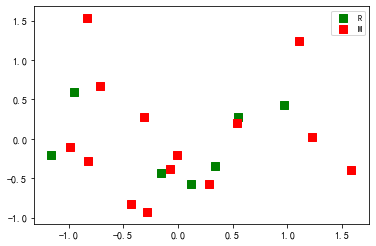

In [12]:
import matplotlib.pyplot as plt
import time
def plotBestFit(data0,data1):

    a = np.shape(data0)[0]
    b = np.shape(data1)[0]

    
    axis_x0 = []
    axis_y0 = []    
    axis_x1 = []
    axis_y1 = []

    
    for aa in range(a):
        axis_x0.append(data0[aa,0])
        axis_y0.append(data0[aa,1])
    for bb in range(b):
        axis_x1.append(data1[bb,0])
        axis_y1.append(data1[bb,1])
     
        
    fig = plt.figure()
    #ax = Axes3D(fig)
    ax = fig.add_subplot(111)
    ax.scatter(axis_x0, axis_y0, s=50, c='green', marker='s')
    ax.scatter(axis_x1, axis_y1, s=50, c='red', marker='s')

    plt.legend(fontsize='small',labels=[ 'R','M'])  
    plt.savefig("模型融合-sonar-二维点图.png")
    plt.show()
    
pca = decomposition.PCA(n_components=2)
X_pca = pca.fit_transform(test_features.astype(np.float64))

plotBestFit(X_pca[y_pred == 0],X_pca[y_pred == 1])

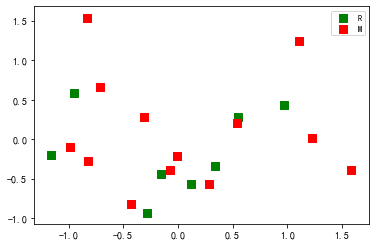

In [14]:
plotBestFit(X_pca[test_labels2 == 0],X_pca[test_labels2  == 1])

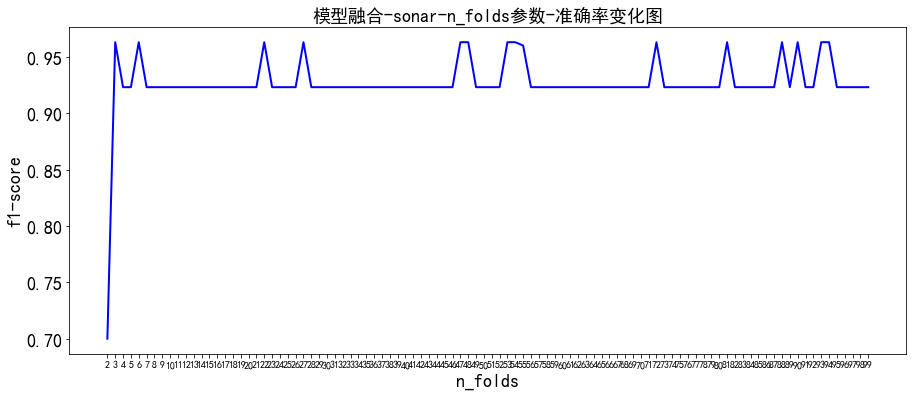

In [23]:
# -*- coding: utf-8 -*-
import numpy as np
import matplotlib.pyplot as plt
from pylab import *                                 #支持中文
mpl.rcParams['font.sans-serif'] = ['SimHei']

#X轴，Y轴数据
# x = [0,1,2,3,4,5,6]
# y = [0.3,0.4,2,5,3,4.5,4]
plt.figure(figsize=(15,6)) #创建绘图对象
plt.plot(x,y,"b",linewidth=2)   #在当前绘图对象绘图（X轴，Y轴，蓝色虚线，线宽度）
plt.xticks(x, x)
plt.yticks(size=18)
plt.xlabel("n_folds",size=18) #X轴标签
plt.ylabel("f1-score",size=18)  #Y轴标签
plt.title("模型融合-sonar-n_folds参数-准确率变化图",size=18) #图标题
# 设置数字标签
# for a, b in zip(x, y):
#     plt.text(a, b, b, ha='center', va='bottom')


plt.savefig("模型融合-sonar-n_folds参数选择图.png") #保存图
plt.show()  #显示图

In [21]:
# 模型融合
model_list = [knn_cv,dt_cv,nb_sv]
S_train, S_test = stacking(model_list, train_features, train_labels2,test_features, regression=False, n_folds=3)

# # Initialize 2-nd level model
model = GradientBoostingClassifier(learning_rate = 0.1, n_estimators = 100, max_depth = 3)

# # Fit 2-nd level model
model_s = model.fit(S_train, train_labels2)

# # Predict
y_pred = model_s.predict(S_test)

# Final prediction score
# print('Final prediction score: [%.8f]' % metrics.accuracy_score(y_test, y_pred))
acc_score_test = metrics.accuracy_score(y_pred, test_labels2)
precision_score_test = metrics.precision_score(y_pred, test_labels2)
recall_score_test = metrics.recall_score(y_pred, test_labels2)
f1_score_test = metrics.f1_score(y_pred, test_labels2)
roc_auc_score_test = metrics.roc_auc_score(y_pred, test_labels2)

print('Final 测试集准确率：{}\n'.format(acc_score_test))
print('Final 测试集精确率：{}\n'.format(precision_score_test))
print('Final 测试集召回率：{}\n'.format(recall_score_test))
print('Final 测试集f1评分：{}\n'.format(f1_score_test))
print('Final 测试集AUC值：{}\n'.format(roc_auc_score_test))
        
        

# model_est(model_dict_s, x_train, x_test, y_train, y_test) 



Final 测试集准确率：0.9523809523809523

Final 测试集精确率：1.0

Final 测试集召回率：0.9285714285714286

Final 测试集f1评分：0.962962962962963

Final 测试集AUC值：0.9642857142857143



In [9]:
print(rel_pred)

[1 0 0 0 1 1 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1]


In [20]:
print(test_labels2)

[1 0 0 0 1 0 1 1 0 1 1 0 1 1 1 1 1 1 0 0 1]
